In [27]:
import numpy as np
import matplotlib.pyplot as plt


b0 = 0.170639
b1 = 0.341278
b2 = 0.170639

a1 = -0.541295
a2 = 0.223851

N = 100

x = np.zeros(N)
y = np.zeros(N)

y_z1 = 0
y_z2 = 0

x_z1 = 0
x_z2 = 0

x[0] = 1

for i in range(len(y)):
    y[i] = b0*x[i] + b1*x_z1 + b2*x_z2 - a1*y_z1 - a2*y_z2
    y_z2 = y_z1
    y_z1 = y[i]
    
    x_z2 = x_z1
    x_z1 = x[i] 


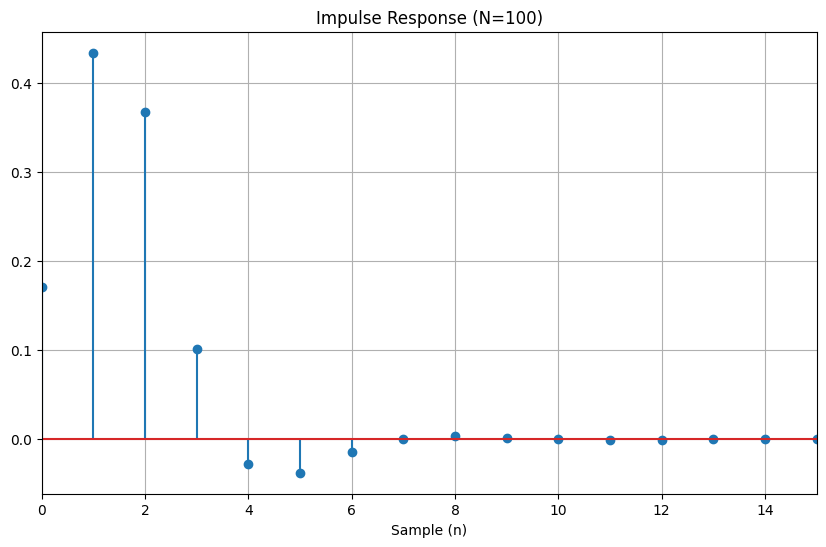

In [28]:
plt.figure(figsize=(10,6))
plt.stem(y)
plt.xlim([0,15])
plt.title(f"Impulse Response (N={N})")
plt.xlabel("Sample (n)")


plt.grid(True)

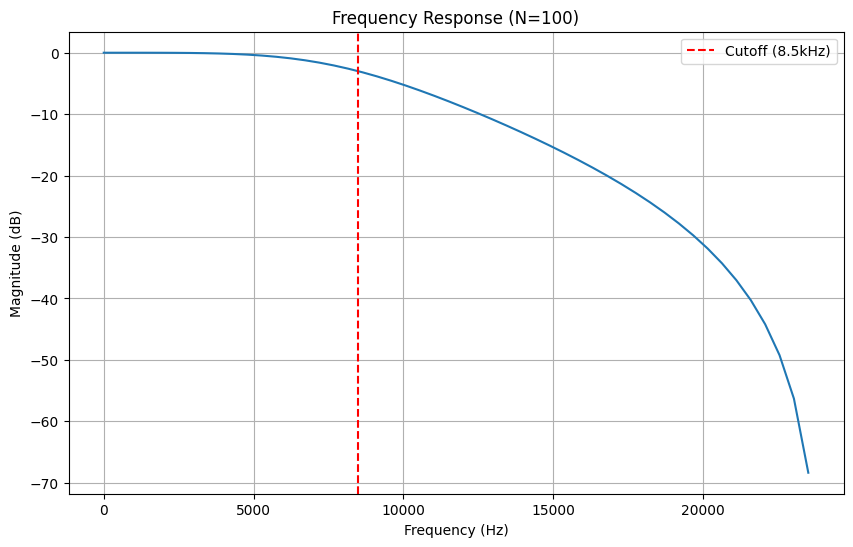

In [29]:
import numpy as np
import matplotlib.pyplot as plt


Y_fft = np.fft.fft(y)

magnitude = 20 * np.log10(np.abs(Y_fft) + 1e-10)

Fs = 48000
N = len(y)
freqs = np.fft.fftfreq(N, 1/Fs)

half_N = N // 2

plt.figure(figsize=(10, 6))
plt.plot(freqs[:half_N], magnitude[:half_N])
plt.title(f"Frequency Response (N={N})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.axvline(8500, color='r', linestyle='--', label='Cutoff (8.5kHz)') 
plt.legend()
plt.show()